


# Introduction

### Statement of Problem

Given the recent developments in data science and analytics strategies, there is a growing demand data from traditional and untraditional sources. Social Media is a major source of non-traditional data in the form of chats, messages, news feeds Most data obtained from social media sources are in unstructured form. Natural language processing techniques help analyze the unstructured data. Patterns in the data are used to infer sentiments which in turn assist organizations in  decision making.

This data can be analysed to identify trends pertaining to particular subjects, gauge public opinion, get feedback on historical actions, and also assist in making future ones. Examples of such opinions are those related to clean energy, politics, new technology, climate change etc.

Climate change has garnered increasing public attention in recent years, after being treated as a strictly scientific issue for decades. Governments and international organizations such as the UN are working - harder than ever - to establish and sustain community perception on issue. Companies are concerned (more than ever) in making sure that products do not just meet government-established environmental standards but also (most importantly) are percieved by thier costumers as being climate change-friendly. 

######  As a top data analytics company with experience in behavioural science and sentiment data analysis, NM6Analytica has been tasked with building and intelligent tool that analyses community data, understanding sentiments and making recommendations on community perception towards climate change .


###  Aim of the Project

The aim of this project is to gauge the public perception of climate change using twitter data. This is with the end goal of developing a robust machine learning tool that can;

- identify how the general public percieves climate change based on thier tweets. This will allow companies to tailor thier product towards the culture of thier grassroot market and increase their insights with respect to  future marketing strategies.

- infer if/by how much,  a person believes in climate change and could possibly be converted to a new customer based on their tweets.


<img src="https://cached.imagescaler.hbpl.co.uk/resize/scaleHeight/815/cached.offlinehbpl.hbpl.co.uk/news/OMC/Donald-Trump-Twitter-2019092410510795.jpg">



### Meet the Team
- Segun Lawal - CEO
- Mohammed - Admin
- Samuel - CTO
- Camilus - CTO
- Yinka - CTO

<a id="cont"></a>
# Table of contents:
1. <a href=#section-one>Importing Packages</a>

2. <a href=#section-two>Loading data</a>

3. <a href=#section-three>Exploratory data analysis</a>

4. <a href=#section-four>Data Engineering</a>

5. <a href=#section-five>Modelling</a>

6. <a href=#section-six>Model Performance</a>

7. <a href=#section-seven>Submission</a>

8. <a href=#section-eight>Conclusion and Recommendations</a>

   <a href=#section-ref>References</a>


<img src="https://media0.giphy.com/media/vV0g2dowQ02WrnsgEV/giphy.gif?cid=ecf05e47g5rp6546pk52nzdc9ibh4rltdlzcucb80sih78ny&rid=giphy.gif&ct=g">


<a id="section-one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
#pip install wordcloud

In [2]:
# import comet_ml at the top of your file
from comet_ml import Experiment

In [3]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="vYZLU5qF1hfDnC1UNRgZopRTg",
    project_name="2201acds-nm6",
    workspace="yinka-akindele",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/yinka-akindele/2201acds-nm6/434909291647434c8d89273f865e28cd



In [4]:
# Conventional Libraries
import re
import csv
import nltk
import pickle

# import spacy
import string
import numpy as np
import pandas as pd
import html


# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud


# Necessary donloads for nlp: Please kindly uncomment the followig lines 
#to download the packages, if you do not have them.

#nlp = spacy.load("en_core_web_sm")
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')

# Preprocessing tools
#import en_core_web_sm
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet 

#Basic sklearn tools
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.utils import resample

# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

<a id="section-two"></a>
## 2. Loading the Data
<a href=#cont>Back to Table of Contents</a>

In [5]:
# import dataset 
train = pd.read_csv('../Dataset/train.csv')
test = pd.read_csv('../Dataset/test_with_no_labels.csv')

<a id="section-three"></a>
# 3. Exploratory data analysis
<a href=#cont>Back to Table of Contents</a>
### *Far better an approximate answer to the right question, which is often vague, than an exact answer to the wrong question, which can always be made precise.*
### - John W. Tukey

<img src="https://media1.giphy.com/media/xT9C25UNTwfZuk85WP/200.webp?cid=ecf05e47t1jd4v0ee1s335gds6plvujnbmln22ya1jctb1s2&rid=200.webp&ct=g">

For NM6Analytica to provide an extensive and dependable machine learning product for our clients, it must be established as a foundational basic that the datasets are adequate. 

In [6]:
# How is the general picture of our dataset?

print(train.shape)
print(test.shape)

display(train.head())
display(test.head())

#are there retweets - or are all the tweets independent ideas?
retweets = round((1-(train['message'].nunique()/len(train['message'])))*100,2)
print('Retweets in train data:')
print(retweets,'%')

#How many classes are we looking at?
print('Classes: ',train['sentiment'].unique())

(15819, 3)
(10546, 2)


sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

Retweets in train data:
10.05 %
Classes:  [ 1  2  0 -1]


From the peek at the dataset, it can be observed that the train data contains over 15,000 tweets. That is quite sufficient for our machine learning activity. The test data looks consistent with the train set.

The sentiment column is divided into 4 classes:

* [ 2 ] News : Tweets linked to factual news about climate change.

* [ 1 ] Pro : Tweets that support the belief of man-made climate change.

* [ 0 ] Neutral : Tweets that neither support nor refuse beliefs of climate change.

*  [-1 ] Anti : Tweets that do not support the belief of man-made climate change.

From indications, Retweets account for 10% of the train data. This information will be useful later...

For easier understanding/exploration of the dataset, let us update that sentiment column with the sentiment names.

In [7]:
sentiment = train['sentiment']
word_sentiment = []

for i in sentiment :
    if i == 1 :
        word_sentiment.append('Pro')
    elif i == 0 :
        word_sentiment.append('Neutral')
    elif i == -1 :
        word_sentiment.append('Anti')
    else :
        word_sentiment.append('News')

train['sentiment'] = word_sentiment

#### Class distribution: 

Now that we know that our data contains four classes, let us take a closer look at how the tweets are distributed across these four classes.

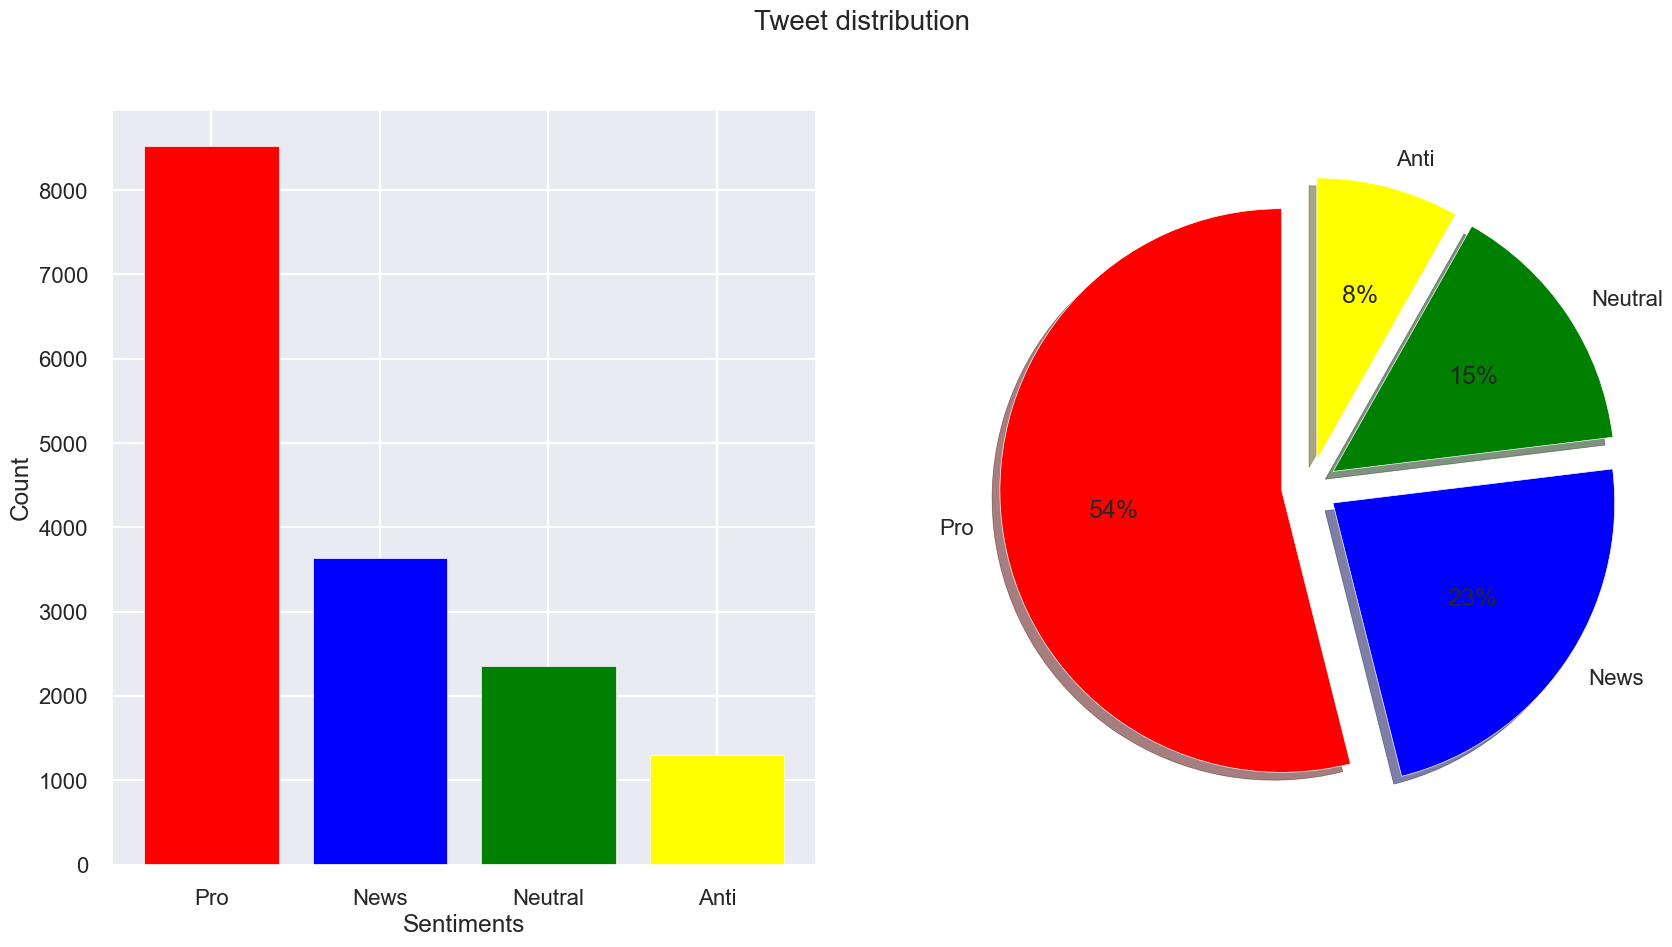

In [8]:
# Display target distribution
style.use('seaborn-pastel')

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=100)

#sns.countplot(train['sentiment'], ax=axes[0],)
axes[0].bar(['Pro', 'News', 'Neutral', 'Anti'],train['sentiment'].value_counts(), color=['red','blue','green','yellow'])
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Sentiments')

axes[1].pie(train['sentiment'].value_counts(),
            labels=['Pro', 'News', 'Neutral', 'Anti'],
            autopct='%1.0f%%',
            shadow=True,
            colors=['red','blue','green','yellow'],
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Tweet distribution', fontsize=20)
plt.savefig('../resources/plot_images/tweet_distn.png')
plt.show()

A close look at the above distribution indicates that the data is severely imbalanced with the majority of tweets falling in the 'pro' category, supporting the belief of man-made climate change while just 6% are anti-climate change.

It must be added here that skewed datasets generally produce poor predictions...

## Length of tweet: 
It is widely accepted that people with more conviction on a specific topic tend to speak or write more when such topics are discussed. In tweets, this can be observed in the legnth of the tweets. Tweeters with stronger conviction should tend to be more lengthy in thier expression than lesser-convicted tweeters.

Lets us check the conviction character of the different classes of tweeters in our dataset.

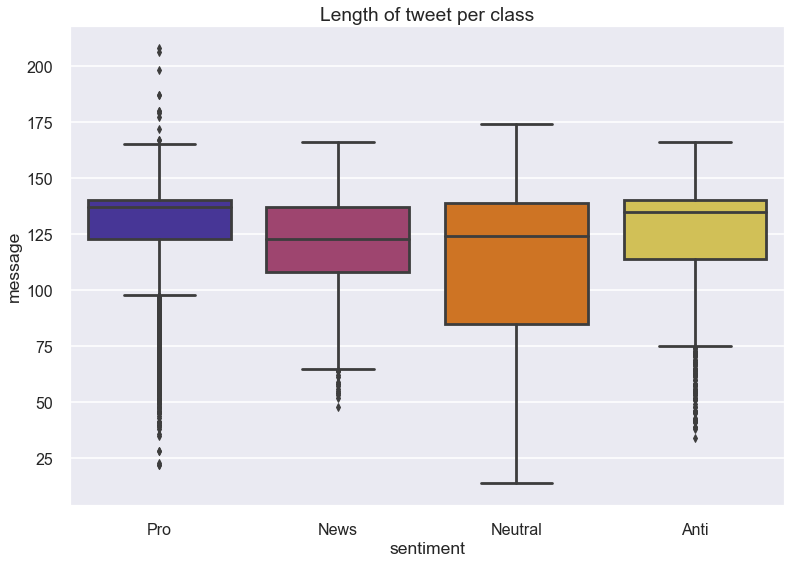

In [9]:
#get the legnth of each tweet in the message column
legnth = train['message'].str.len()

# Compile the legnth of the tweets per class and plot a distribution of the length 
#using a box plot
sns.boxplot(x=train['sentiment'], y=legnth, data=train, palette='CMRmap')
plt.title('Length of tweet per class')
plt.savefig('../resources/plot_images/length_of_tweet_per_class.png')
plt.show()

From the boxplot, it could be observed that tweets that fall in the pro climate change class are generally longer and the shortest tweets belong to the anti climate change class. 

*It seems that we have strong-witted pros here!!*

It is worthy to also not that neutral climate change tweets tend to have the most variability in tweet length. 

## Hashtags
For years, Hashtags have been a powerful feature used in sorting and organizing tweets. They provide an   excellent approach to show that a content is related to a specific issue.

Given this, we figured it would be  helful to unravel what the most popular hashtags are in each the classes. This will allow us to obtain a better grasp of the types of knowledge ingested and shared by members of each class.

In [10]:
def hashtag_extract(tweet):
    
    """
    This function takes in a tweet and extracts the top 15 hashtag(s) using regular expressions
    These hashtags are stored in a seperate dataframe 
    along with a count of how frequenty they occur
    
    Input:
    tweet: original tweets
           datatype: 'str'
           
    Output:
    hashtag_df: dataframe containing the top hashtags in the tweets
              datatype: dataframe         
    """
    
    h_tags = []
    
    for i in tweet:
        hash = re.findall(r"#(\w+)", i)
        h_tags.append(hash)
        
    h_tags = sum(h_tags, [])
    frequency = nltk.FreqDist(h_tags)
    
    df_hashtag = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    df_hashtag = df_hashtag.nlargest(15, columns="count")

    return df_hashtag


In [11]:
# Extract hashtags for each of the four classes
pro = hashtag_extract(train['message'][train['sentiment'] == 'Pro'])
anti = hashtag_extract(train['message'][train['sentiment'] == 'Anti'])
neutral = hashtag_extract(train['message'][train['sentiment'] == 'Neutral'])
news = hashtag_extract(train['message'][train['sentiment'] == 'News'])

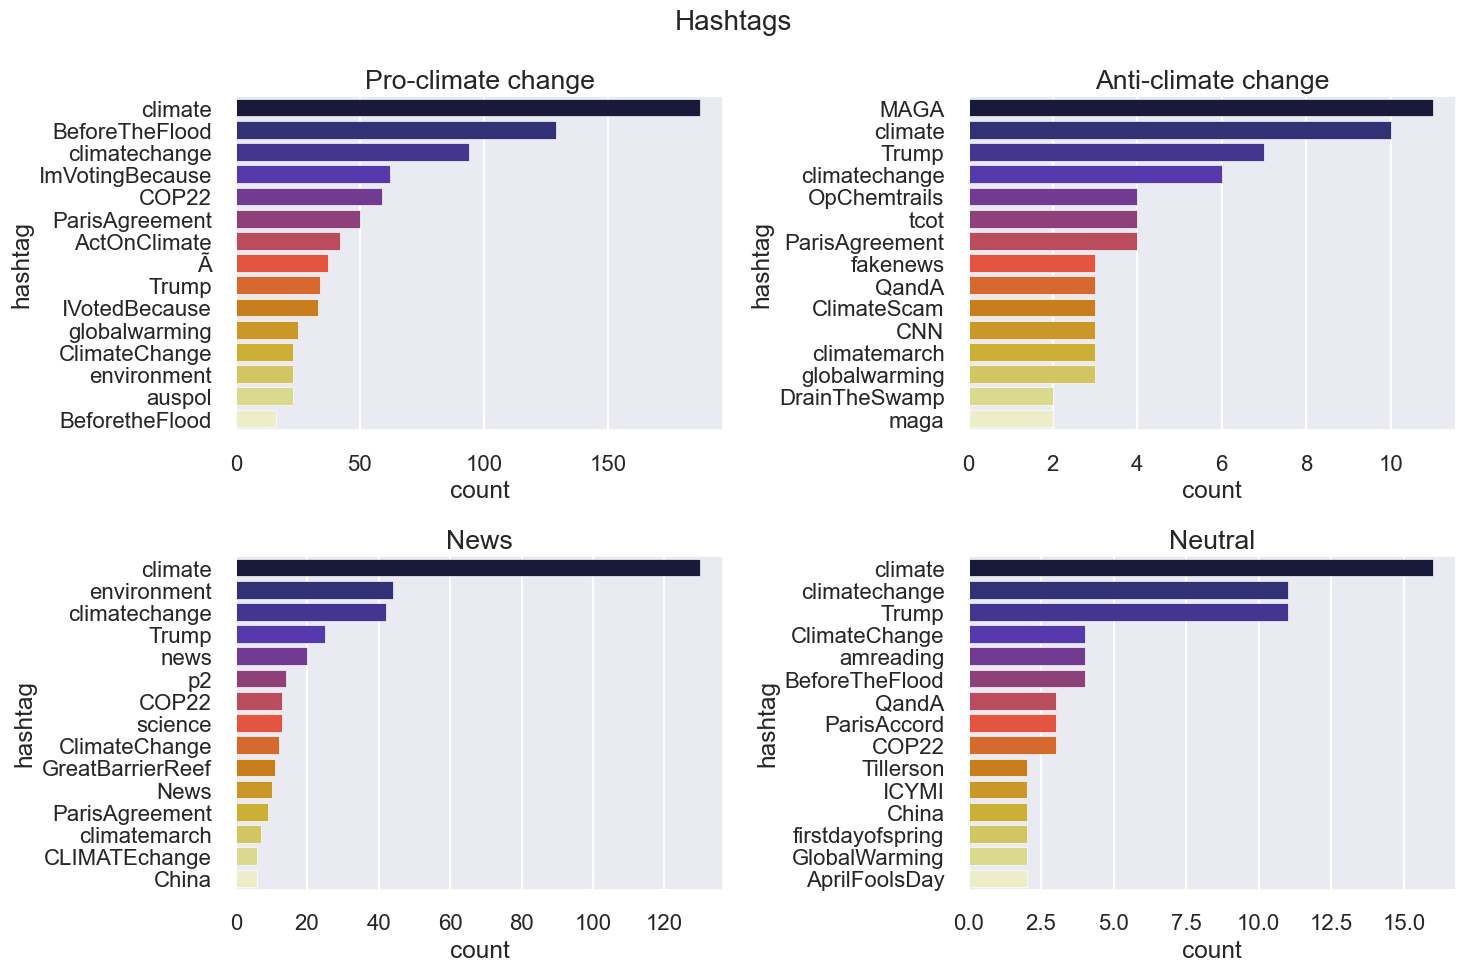

In [12]:
fig, axes = plt.subplots(ncols=2, 
                         nrows=2, 
                         figsize=(15, 10), 
                         dpi=100)

sns.barplot(data=pro,y=pro['hashtag'], x=pro['count'], palette=("CMRmap"),ax=axes[0,0])
axes[0,0].set_title('Pro-climate change')

sns.barplot(data=anti,y=anti['hashtag'], x=anti['count'], palette=("CMRmap"),ax=axes[0,1])
axes[0,1].set_title('Anti-climate change')

sns.barplot(y=news['hashtag'], x=news['count'], palette=("CMRmap"),ax=axes[1,0])
axes[1,0].set_title('News')

sns.barplot(y=neutral['hashtag'], x=neutral['count'], palette=("CMRmap"),ax=axes[1,1])
axes[1,1].set_title('Neutral')

fig.suptitle('Hashtags', fontsize=20)
plt.tight_layout()
plt.show()

### Observation:

## Popular words
The machine learning tool developed in this project is based on language and words. We would like to know the popular words used across this various classes. This will help us to understand how customers think/are thinking. 

Of course, users of our tool would need to align thier products or actions towards the culture of popular thought. How are the customers expressing their thoughts???

To obtain the answer to this question ([here]), we must make some adjustments to the features in our dataset.

Lets do some engineering!!!

<a id="section-four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

#### Where there is data smoke, there is business fire...
##### - Thomos Redman

Looking at the data, we can observe that the tweets returned contain several messy contents.

First, we will remove the new lines probably generated during html decoding.

In [13]:
#This block of code removes \n from each tweet
 
for i in  (train['message']):
    i=i.replace('\n', '')
    i=html.unescape(i)

Great. Our data is free of messy snooky html inputs. However, there are some other problems!!!

Most times twitter users attach media files like images, video etc to thier tweets. Scraping this data will caused thier conversion into JSON. This can be troublesome. We need to remove them!!!

Also, we will need to clean hash characters (not hashtags); @ too...

In [14]:
#This block of code conducts further cleaning. We will be employing
#Regex for this task

for i in range (len(train['message'])):
    train['message'][i]=re.sub(r"(@[A-Za-z0-9_]+)|[^\w\s]|http\S+","",train['message'][i])
train.head()

C:\Users\yinka\AppData\Local\Temp\ipykernel_1780\3445832432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['message'][i]=re.sub(r"(@[A-Za-z0-9_]+)|[^\w\s]|http\S+","",train['message'][i])


sentiment                                            message  tweetid
0       Pro  PolySciMajor EPA chief doesnt think carbon dio...   625221
1       Pro  Its not like we lack evidence of anthropogenic...   126103
2      News  RT  Researchers say we have three years to act...   698562
3       Pro  TodayinMaker WIRED  2016 was a pivotal year in...   573736
4       Pro  RT  Its 2016 and a racist sexist climate chang...   466954

Earlier, we had pointed out the necessesity of knowing the legnth of the tweets. Let us quickly create a new column showing this for our dataset.

In [15]:
train['Tweet length'] = train['message'].str.len()
train.head()

sentiment                                            message  tweetid  \
0       Pro  PolySciMajor EPA chief doesnt think carbon dio...   625221   
1       Pro  Its not like we lack evidence of anthropogenic...   126103   
2      News  RT  Researchers say we have three years to act...   698562   
3       Pro  TodayinMaker WIRED  2016 was a pivotal year in...   573736   
4       Pro  RT  Its 2016 and a racist sexist climate chang...   466954   

   Tweet length  
0           102  
1            61  
2            86  
3            73  
4            99

For uniformity, let us change all text to lower case

In [16]:
#convert to lowercase
train['message']=train['message'].str.lower()
train.head()

sentiment                                            message  tweetid  \
0       Pro  polyscimajor epa chief doesnt think carbon dio...   625221   
1       Pro  its not like we lack evidence of anthropogenic...   126103   
2      News  rt  researchers say we have three years to act...   698562   
3       Pro  todayinmaker wired  2016 was a pivotal year in...   573736   
4       Pro  rt  its 2016 and a racist sexist climate chang...   466954   

   Tweet length  
0           102  
1            61  
2            86  
3            73  
4            99

Alright, now thats out of the way.
The team will now perform tokenization and lemmanization. 

If we can recall,
Tokenization divides text into a sequence of 'words'. Lemmanization on the other hand, groups words of similar meaning together

In order to get the best out of hashtags (the necessity of hashtags in this project was explained [here], it will be helpful to create feature for it.

### Tokenisation

In [17]:
tokeniser = TreebankWordTokenizer()
train['tweet tokens'] = train['message'].apply(tokeniser.tokenize)

#we drop the message column
#train.drop(['message'], axis=1, inplace=True)

train.head()

sentiment                                            message  tweetid  \
0       Pro  polyscimajor epa chief doesnt think carbon dio...   625221   
1       Pro  its not like we lack evidence of anthropogenic...   126103   
2      News  rt  researchers say we have three years to act...   698562   
3       Pro  todayinmaker wired  2016 was a pivotal year in...   573736   
4       Pro  rt  its 2016 and a racist sexist climate chang...   466954   

   Tweet length                                       tweet tokens  
0           102  [polyscimajor, epa, chief, doesnt, think, carb...  
1            61  [its, not, like, we, lack, evidence, of, anthr...  
2            86  [rt, researchers, say, we, have, three, years,...  
3            73  [todayinmaker, wired, 2016, was, a, pivotal, y...  
4            99  [rt, its, 2016, and, a, racist, sexist, climat...

### Part of Speech
It will also be useful to retrieve the part of speech before lemmatization. It would do us no good to misinterprete 'trump' as a verb for 'Trump' as a noun. Remember that we have changed all words to lowercase....

In [18]:
  """
    This function obtains a pos tag and returns the
    part of speech
    Input: 
    tag: POS tag
        datatype: str
    
    Output:
    wordnet.pos: Part of Speech
                datatype: str 
        
    """
def get_pos(tag):

        if tag.startswith('V'):
            return wordnet.VERB 
        
        elif tag.startswith('J'):
            return wordnet.ADJ     

        elif tag.startswith('R'):
            return wordnet.ADV
        
        elif tag.startswith('N'):
            return wordnet.NOUN       
    
        else:
            return wordnet.NOUN

In [19]:
train['POS_tag'] = train['tweet tokens'].apply(nltk.tag.pos_tag)
train['POS_tag'] = train['POS_tag'].apply(lambda l: [(word, get_pos(tag)) for (word, tag) in l])

### Lemmatization

In [20]:
lemmatizer = WordNetLemmatizer()

In [21]:
'''
    This function takes words, lemmatizes the word and
    returns the lemmatized version of the word.
    
    Input:
        word: string to be lemmatized
        datatype: str
    Output:
        datatype: list
'''

def lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words] 

In [22]:
train['tweet tokens'] = train['tweet tokens'].apply(lemma, args=(lemmatizer, ))

In [23]:
train.head()

sentiment                                            message  tweetid  \
0       Pro  polyscimajor epa chief doesnt think carbon dio...   625221   
1       Pro  its not like we lack evidence of anthropogenic...   126103   
2      News  rt  researchers say we have three years to act...   698562   
3       Pro  todayinmaker wired  2016 was a pivotal year in...   573736   
4       Pro  rt  its 2016 and a racist sexist climate chang...   466954   

   Tweet length                                       tweet tokens  \
0           102  [polyscimajor, epa, chief, doesnt, think, carb...   
1            61  [it, not, like, we, lack, evidence, of, anthro...   
2            86  [rt, researcher, say, we, have, three, year, t...   
3            73  [todayinmaker, wired, 2016, wa, a, pivotal, ye...   
4            99  [rt, it, 2016, and, a, racist, sexist, climate...   

                                             POS_tag  
0  [(polyscimajor, a), (epa, n), (chief, n), (doe...  
1  [(its, n), (not, r), (like, n), (we, n), (lack...  
2  [(rt, n), (researchers, n), (say, v), (we, n),...  
3  [(todayinmaker, n), (wired, v), (2016, n), (wa...  
4  [(rt, v), (its, n), (2016, n), (and, n), (a, n...

The team would now continue down to remove stop words. 
If we would recall, Stop words are words which do not contain important significance resulting from the fact that they commonly return a vast amount of unnecessary information.

In the case of this project, we were careful to exempt 'not' from the stop words. This was to preserve context.

In [24]:
#Remove stop wards
for i in train['tweet tokens']:
    i=[word for word in i if not word in stopwords.words('english') and word != 'not'] 

In [25]:
train.head()

sentiment                                            message  tweetid  \
0       Pro  polyscimajor epa chief doesnt think carbon dio...   625221   
1       Pro  its not like we lack evidence of anthropogenic...   126103   
2      News  rt  researchers say we have three years to act...   698562   
3       Pro  todayinmaker wired  2016 was a pivotal year in...   573736   
4       Pro  rt  its 2016 and a racist sexist climate chang...   466954   

   Tweet length                                       tweet tokens  \
0           102  [polyscimajor, epa, chief, doesnt, think, carb...   
1            61  [it, not, like, we, lack, evidence, of, anthro...   
2            86  [rt, researcher, say, we, have, three, year, t...   
3            73  [todayinmaker, wired, 2016, wa, a, pivotal, ye...   
4            99  [rt, it, 2016, and, a, racist, sexist, climate...   

                                             POS_tag  
0  [(polyscimajor, a), (epa, n), (chief, n), (doe...  
1  [(its, n), (not, r), (like, n), (we, n), (lack...  
2  [(rt, n), (researchers, n), (say, v), (we, n),...  
3  [(todayinmaker, n), (wired, v), (2016, n), (wa...  
4  [(rt, v), (its, n), (2016, n), (and, n), (a, n...

In [26]:
train['tweet tokens'][train['sentiment']=='Pro']

0        [polyscimajor, epa, chief, doesnt, think, carb...
1        [it, not, like, we, lack, evidence, of, anthro...
3        [todayinmaker, wired, 2016, wa, a, pivotal, ye...
4        [rt, it, 2016, and, a, racist, sexist, climate...
5        [worth, a, read, whether, you, do, or, dont, b...
                               ...                        
15807    [scottpruit, climate, change, comment, would, ...
15811    [rt, shes, thinking, about, how, shes, going, ...
15812    [rt, 2016, hottest, year, in, history, also, i...
15813    [rt, epa, head, falsely, claim, carbon, emissi...
15814    [rt, they, took, down, the, material, on, glob...
Name: tweet tokens, Length: 8530, dtype: object

### Popular Words
Words used by tweeter are windows into customer thoughts. The importance of popular words in this project has been explained [here].

In [27]:
def frequency(tweet):
    
    """
    This function determines the frequency of each word in a collection of tweets 
    and stores the 25 most frequent words in a dataframe, 
    sorted from most to least frequent
    
    Input: 
    tweet: original tweets
           datatype: 'str'
           
    Output: 
    frequency: dataframe containing the top 25 words 
               datatype: dataframe          
    """
    for i in tweet.index:
        tweet[i]=' '.join(tweet[i])
    # Count vectorizer excluding english stopwords
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(tweet)
    
    # Count the words in the tweets and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Create a dataframe to store the top 25 words and their frequencies
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
    frequency = frequency.head(25)
    
    return frequency

Let us visualize the words...

Observations:

* Climate and change are the most popular words used by tweeter. This is expected as protagonists and critiques of climate change would all use these words.

* 'Trump' is another frequently occuring word across all 4 classes. This would not be unrelated to political weather. On June 1, 2017, United States President Donald Trump controversially announced that the U.S. would cease all participation in the 2015 Paris Agreement on climate change mitigation. Due to his status in the society, it is expected that discussions would center around this personality.

* Words such as believe, fight, change, think, die are popular amongst tweeters in the pro category. On the other hand, tweets by the anti class are dominated by words such as tax, liberal, tax, haux and scam. The difference in the language is obvious and shows that while the former group try to motivate and strengthen the argument for climate change, the later group are rather playing down on the narrative. 

* The popularity of words such as talk, ask, say in the neutral class shows the need of further convincing and general luke-warmness. 

* The frequent use of energy, scientist, use, study, pruit indicates the inclination of this group towards facts and evidence rather than logic for the support of their stands. 




Its time to do some modelling. However from the histogram obtained earlier, we observed that the four classes had uneven sizes. This particularity can cause biased predictions. So lets even out the predictions.

In [28]:
#As a rule of thumb, when resizing, the resampled class should normally be half of 
#he total size of class with the largest size

len(train[train['sentiment']=='Pro'])

8530

In [29]:
class_size=4500
resampled_classes = []

# For each label
for label in train['sentiment'].unique():
    # Get num. of observations from this class
    label_size = len(train[train['sentiment']==label])
    
    # If label_size < class size the upsample, else downsample
    if label_size < class_size:
        # Upsample
        label_data = train[train['sentiment'] == label]
        label_resampled = resample(label_data, replace=True, n_samples=class_size, random_state=27) 
    else:
        # Downsampleresampled_data = np.concatenate(resampled_classes, axis=0)
        label_data = train[train['sentiment'] == label]
        label_resampled = resample(label_data, replace=False, n_samples=class_size, random_state=27)
        
    resampled_classes.append(label_resampled)
    
train = pd.concat(resampled_classes, axis=0)
train.shape

(18000, 6)

<a id="section-five"></a>
# 5. Modelling
<a href=#cont>Back to Table of Contents</a>

In this stage, we will classification models for the task. The models to be considered will be:

+ Logistic regression model
+ SVC model
+ Random forest model
+ Naive Bayes model
+ KNN model


## Logistic regression classification
Logistic Regression uses the probability of a data point to belonging to a certain class to classify each datapoint to it's best estimated class

Logistic regression has been rated as the best performing model for linearly separable data especially if it's predicting binary data(Yes & NO or 1 & 0), and performs better when there's no class imbalance. 

The figure below is the sigmoid function logistic regression models use to make predictions:

![1*a5QwiyaSyvRa6n3VKYVEnQ.png](https://cdn-media-1.freecodecamp.org/images/1*a5QwiyaSyvRa6n3VKYVEnQ.png)

## Support Vector classification model
In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. The goal of the SVM algorithm is to create the best line or decision boundary that can seperate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:

![support-vector-machine-algorithm.png](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)

## Random forest classification
Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. As the name suggests, it is a “forest” of trees!

The following diagram is a visual representation of the random forest classification method:

![1*58f1CZ8M4il0OZYg2oRN4w.png](https://miro.medium.com/max/1400/1*58f1CZ8M4il0OZYg2oRN4w.png)

## Naive Bayes classification
Naive Bayes is a classification algorithm that uses the principle of Bayes theorem to make classifications and assumes independent variables to be statistically independent from each other .

Bayes Theorem:

$$ P(A \mid B) = \frac{P(B \mid A) * P(A)}{P(B)}$$

* P(A|B) is the posterior probability of class (A, target) given predictor (B, attributes).

* P(A) is the prior probability of class.

* P(B|A) is the likelihood which is the probability of the predictor given class.

* P(B) is the prior probability of the predictor.


## K Nearest Neighbors classification
The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

There are various methods for calculating how closely the new datapoint resembles the points in the training set, of which the most commonly known methods are – Euclidian, Manhattan (for continuous) and Hamming distance (for categorical).


New datapoint( Ci ) and multi-classes {1,2,3}. 

KNN Classifier would use one of the distance criteria to classify the new datapoint class.

![A-typical-example-of-a-KNN-classification-for-a-two-class-problem-ie-the-pink-and.png](https://adrianromano.com/wp-content/uploads/2019/02/A-typical-example-of-a-KNN-classification-for-a-two-class-problem-ie-the-pink-and.png)

### Train - Test split
Before we pass our data through our custom pipelines we have to split our train data into a train and test set. This will allow us to independently evaluate our model performance without bias. We wish to reserved 75% of a randomly selected section of the data for training.

In [30]:
train['tweet tokens']=train['tweet tokens'].map(' '.join)

# Seperate features from taget
X = train['tweet tokens'].values
y = train['sentiment'].values

# Split the train data to create validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

## Pipelines

With the train data delineated from the test data, we will now be building the pipeline that will be employed for modelling. The pipeline will allow for two steps viz, vectorization and fitting. This would be achieved respectively, with respect to the classification techniques.

The pipelines consist of 2 steps; vectorization and model fitting.

###### *Vectorization.*

It is well understood in computer science that machines generally deal bettter with numbers. To this end, the vectorization step is necessary to convert our text to numbers. For this project, we employ the TFIDF vectorizer.


TFIDF obtained frequency of each of the words, then uses this frequency to rank the words. We select this technique because we will no longer have to go through the process of data scaling.

In [31]:
# Logistic Regression model
log_reg = Pipeline([('tfidf',TfidfVectorizer()),
               ('clf',LogisticRegression(C=1, 
                                         class_weight='balanced', 
                                         max_iter=1000))])

In [32]:
# Linear SVC model
linear_svc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))])


In [33]:
# Random Forest Classifier
ran_forest = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=100))])

In [34]:
# Naïve Bayes model
n_bayes = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])


In [35]:
# KNN Classifier model
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, 
                                             metric='minkowski', 
                                             p=2))])

# Training the models
The models are trained by passing the train data through each custom pipeline. The trained models are then used to predict the classes for the validation data set.


In [36]:
# Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_Log = log_reg.predict(X_test)


In [37]:
# Linear Support vector classifier
linear_svc.fit(X_train, y_train)
y_pred_svc = linear_svc.predict(X_test)


In [38]:
# Random forest model
ran_forest.fit(X_train, y_train)
y_pred_RF = ran_forest.predict(X_test)


COMET ERROR: Failed to extract parameters from estimator


In [39]:
# Naive Bais model
n_bayes.fit(X_train, y_train)
y_pred_bayes = n_bayes.predict(X_test)


In [40]:
# KNN model
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

<a id="section-six"></a>
# 6. Model Performance
<a href=#cont>Back to Table of Contents</a>

The performance of each model will be evaluated based on the precision, accuracy and F1 score achieved when the model is used to predict the classes for the validation data. We will be looking at the following to determine and visualize these metrics:
- Classification report 
- Confusion matrix

The best model will be selected based on the weighted F1 score. 

In [41]:
# Saving each metric for Logistic Regression model to add to a dictionary for logging
f1 = f1_score(y_test, y_pred_Log, average='weighted')
precision = precision_score(y_test, y_pred_Log, average='weighted')
recall = recall_score(y_test, y_pred_Log, average='weighted')

print("F1 score: ", f1)
print("precision: ", precision)
print("recall: ", recall)

F1 score:  0.79900216988676
precision:  0.7991924104357829
recall:  0.8013333333333333


In [42]:
# Saving each metric for Linear Support vector classifier model to add to a dictionary for logging
f1 = f1_score(y_test, y_pred_svc, average='weighted')
precision = precision_score(y_test, y_pred_svc, average='weighted')
recall = recall_score(y_test, y_pred_svc, average='weighted')

print("F1 score: ", f1)
print("precision: ", precision)
print("recall: ", recall)

F1 score:  0.844085211297961
precision:  0.8459396928852436
recall:  0.8475555555555555


In [43]:
# Saving each metric for Random Forest model to add to a dictionary for logging
f1 = f1_score(y_test, y_pred_RF, average='weighted')
precision = precision_score(y_test, y_pred_RF, average='weighted')
recall = recall_score(y_test, y_pred_RF, average='weighted')

print("F1 score: ", f1)
print("precision: ", precision)
print("recall: ", recall)

F1 score:  0.5382702718588414
precision:  0.5528141055404477
recall:  0.5488888888888889


In [44]:
# Saving each metric for Naive Bayes model to add to a dictionary for logging
f1 = f1_score(y_test, y_pred_bayes, average='weighted')
precision = precision_score(y_test, y_pred_bayes, average='weighted')
recall = recall_score(y_test, y_pred_bayes, average='weighted')

print("F1 score: ", f1)
print("precision: ", precision)
print("recall: ", recall)

F1 score:  0.7634421182304906
precision:  0.769577544979995
recall:  0.7675555555555555


In [45]:
# Saving each metric for K Nearest Neighbour Classifier to add to a dictionary for logging
f1 = f1_score(y_test, y_pred_knn, average='weighted')
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')

print("F1 score: ", f1)
print("precision: ", precision)
print("recall: ", recall)

F1 score:  0.6621741146111578
precision:  0.6778930053749426
recall:  0.6751111111111111


## Model Selection

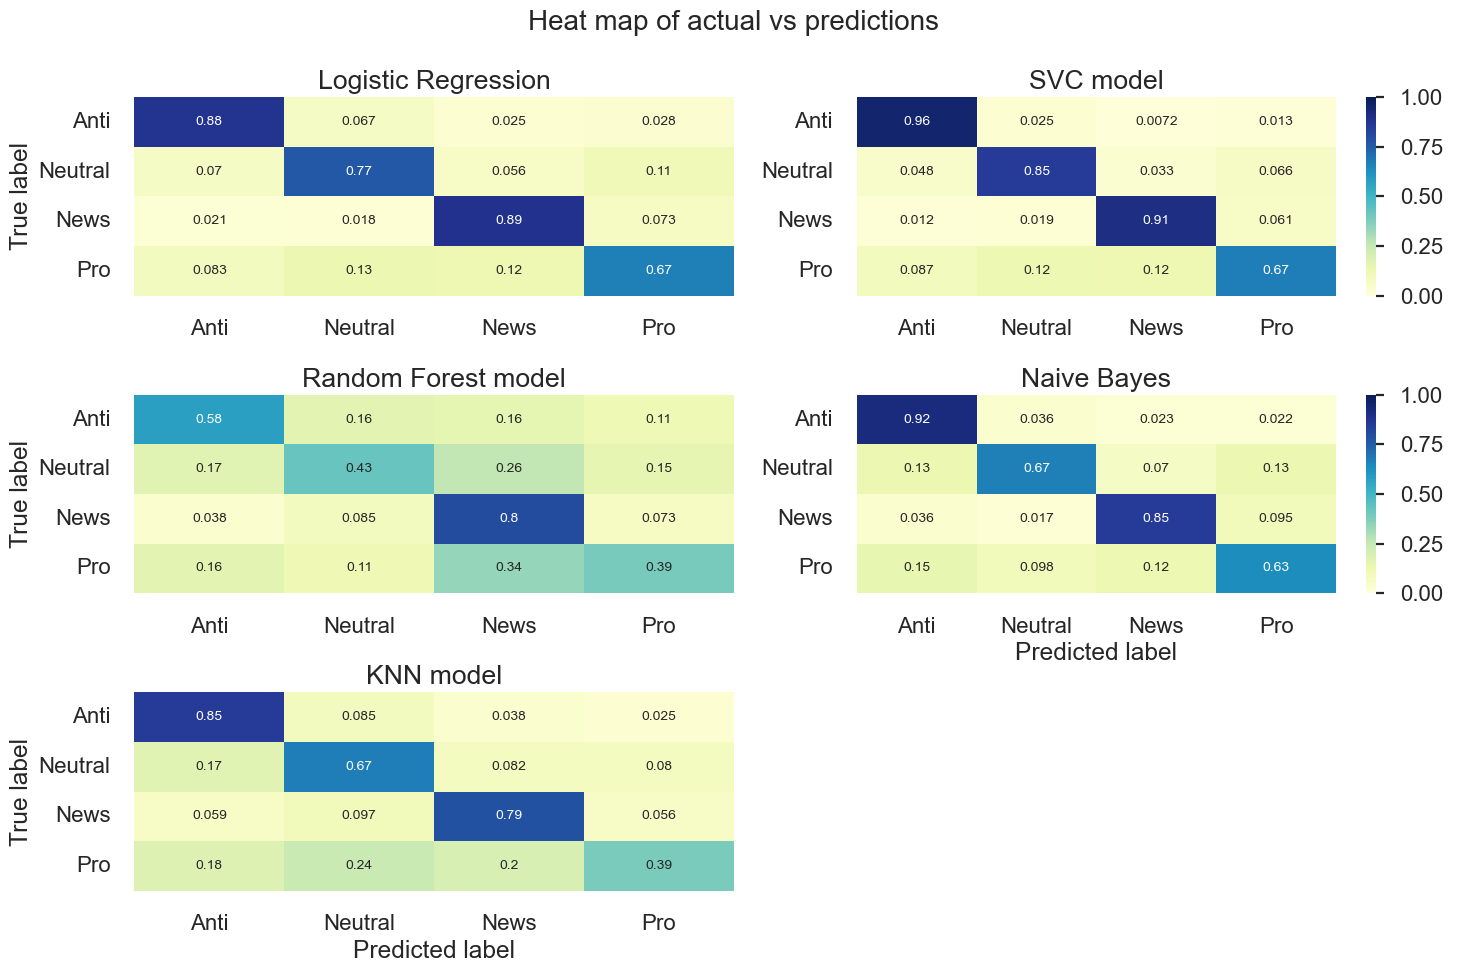

In [46]:
fig, axes = plt.subplots(ncols=2, 
                         nrows=3, 
                         figsize=(15, 10), 
                         dpi=100)

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_Log)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=log_reg.classes_, 
            yticklabels=log_reg.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10}, cbar = False,
            ax=axes[0,0])
axes[0,0].set_ylabel('True label')
axes[0,0].set_title('Logistic Regression')

#repeated for other four axes
cm = confusion_matrix(y_test, y_pred_svc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=linear_svc.classes_, 
            yticklabels=linear_svc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10}, 
            ax=axes[0,1])
axes[0,1].set_title('SVC model')

cm = confusion_matrix(y_test, y_pred_RF)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=ran_forest.classes_, 
            yticklabels=ran_forest.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10}, cbar = False,
            ax=axes[1,0])
axes[1,0].set_ylabel('True label')
axes[1,0].set_title('Random Forest model')

cm = confusion_matrix(y_test, y_pred_bayes)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=n_bayes.classes_, 
            yticklabels=n_bayes.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10}, 
            ax=axes[1,1])
axes[1,1].set_xlabel('Predicted label')
axes[1,1].set_title('Naive Bayes')

cm = confusion_matrix(y_test, y_pred_knn)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=knn.classes_, 
            yticklabels=knn.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10}, ax=axes[2,0], cbar = False,)
axes[2,0].set_ylabel('True label')
axes[2,0].set_xlabel('Predicted label')
axes[2,0].set_title('KNN model')

axes[2,1].axis("off")


fig.suptitle('Heat map of actual vs predictions', fontsize=20)

plt.tight_layout()
plt.show()

That is actually a lot of colors. Lets look at the numbers..

In [47]:
#create empty list to contain a dataframe of each of accuracy, precision, recall and f1 errors; 
#then concatenate the dataframes
judgement=[]
judgement.append(pd.DataFrame({'Model':['Logistic Regression','SVC','Random Forest','Naive Bayes', 'KNN']}))
judgement.append(pd.DataFrame({'Accuracy':[metrics.accuracy_score(y_test, y_pred_Log), metrics.accuracy_score(y_test, y_pred_svc), metrics.accuracy_score(y_test, y_pred_RF),metrics.accuracy_score(y_test, y_pred_bayes),metrics.accuracy_score(y_test, y_pred_knn)]}))
judgement.append(pd.DataFrame({'Precision':[metrics.precision_score(y_test, y_pred_Log, average='micro'), metrics.precision_score(y_test, y_pred_svc, average='micro'), metrics.precision_score(y_test, y_pred_RF, average='micro'),metrics.precision_score(y_test, y_pred_bayes, average='micro'),metrics.precision_score(y_test, y_pred_knn, average='micro')]}))
judgement.append(pd.DataFrame({'Recall':[metrics.recall_score(y_test, y_pred_Log, average='micro'), metrics.recall_score(y_test, y_pred_svc, average='micro'), metrics.recall_score(y_test, y_pred_RF, average='micro'),metrics.recall_score(y_test, y_pred_bayes, average='micro'),metrics.recall_score(y_test, y_pred_knn, average='micro')]}))
judgement.append(pd.DataFrame({'F1':[metrics.f1_score(y_test, y_pred_Log, average='micro'), metrics.f1_score(y_test, y_pred_svc, average='micro'), metrics.f1_score(y_test, y_pred_RF, average='micro'),metrics.f1_score(y_test, y_pred_bayes, average='micro'),metrics.f1_score(y_test, y_pred_knn, average='micro')]}))

judgement=pd.concat(judgement, axis=1)


judgement.set_index('Model', inplace= True)
print(judgement)


                     Accuracy  Precision    Recall        F1
Model                                                       
Logistic Regression  0.801333   0.801333  0.801333  0.801333
SVC                  0.847556   0.847556  0.847556  0.847556
Random Forest        0.548889   0.548889  0.548889  0.548889
Naive Bayes          0.767556   0.767556  0.767556  0.767556
KNN                  0.675111   0.675111  0.675111  0.675111


### Observation:
##### It is obvious from the table and heat map that the  Linear SVC  achieved the best metrics score  0.85 across of metric indices while Random forest perfromed worst . The Linear SVC model is therefore our model of choice for this project.


## Hyperparameter tuning 
Now that the top performing model has been isolated, It will do good to further improve its performance. We attempt to improve it by performing some hyperparameter tuning. 

For this task we are using RandomizedSearchCV. We chose this tool over GridSearchCv because - as the grid search explores parameter space systematically, it can sometimes miss optimal points that are not in the set of fixed points given to it. On the other hand, RandomSearchCV perform a deeper and through exploration of the search space. 

In [48]:

# Set ranges for the parameters that we want to tune
params = {'clf__C': [0.1, 0.2, 0.3, 0.4, 0.5],
          'tfidf__ngram_range' : [(1,1),(1,2)],
          'clf__max_iter': [1500, 2000, 2500, 3000],
          'tfidf__min_df': [2, 3, 4],
          'tfidf__max_df': [0.8, 0.9]}

# Perform randomized search & extract the optimal parameters
Randomized = RandomizedSearchCV(linear_svc, param_distributions=params, cv=5, scoring='accuracy', n_iter=5, random_state=42)
Randomized.fit(X_train,y_train)
print(Randomized.best_estimator_)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1, 2))),
                ('clf',
                 LinearSVC(C=0.3, class_weight='balanced', max_iter=2000))])


In [49]:
# We retrain using the optimum parameters:
lsvc_tuned = Pipeline([('tfidf', TfidfVectorizer(max_df=0.8,
                                                    min_df=2,
                                                    ngram_range=(1,2))),
                  ('clf', LinearSVC(C=0.3,
                                    class_weight='balanced',
                                    max_iter=2000))])

# now, we fit and predict again
lsvc_tuned.fit(X_train, y_train)
y_pred_tuned = lsvc_tuned.predict(X_test)

print('The hyper parameter tuning has improved the Linear SVC model by',
      round(100*((metrics.accuracy_score(y_pred_tuned, y_test)- metrics.accuracy_score(y_pred_svc, y_test))
                 /metrics.accuracy_score(y_pred_tuned, y_test)),1), 'percent')



The hyper parameter tuning has improved the Linear SVC model by 1.0 percent


In [50]:
# Saving each metric for Tuned Linear Support Vector Classifier to add to a dictionary for logging
f1 = f1_score(y_test, y_pred_tuned, average='weighted')
precision = precision_score(y_test, y_pred_tuned, average='weighted')
recall = recall_score(y_test, y_pred_tuned, average='weighted')

print("F1 score: ", f1)
print("precision: ", precision)
print("recall: ", recall)

F1 score:  0.855686227907279
precision:  0.8562411091706836
recall:  0.856


### Logging Experiments on Comet

In [51]:
# Create dictionaries for the data we want to log

params = {"max_df": 0.8,
          "min_df": 2,
          "ngram_range": (1, 2),
        "random_state": 25,
          "C": 0.3,
          "model_type": "lsvc_tuned",
          "class_weight": 'balanced',
          "max_iter": 2000
          }

metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }

In [52]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [53]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/yinka-akindele/2201acds-nm6/434909291647434c8d89273f865e28cd
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.855686227907279
COMET INFO:     precision : 0.8562411091706836
COMET INFO:     recall    : 0.856
COMET INFO:   Parameters:
COMET INFO:     C                                 : 0.3
COMET INFO:     algorithm                         : auto
COMET INFO:     alpha                             : 1.0
COMET INFO:     bootstrap                         : True
COMET INFO:     ccp_alpha                         : 0.0
COMET INFO:     class_prior                       : 1
COMET INFO:     class_weight                      : balanced
COMET INFO:     clf                               : LinearSVC(C=0.3, class_weight='balanced', max_iter=2000)
COMET INFO:   

COMET INFO:     l1_ratio                          : 1
COMET INFO:     leaf_size                         : 30
COMET INFO:     loss                              : squared_hinge
COMET INFO:     max_depth                         : 5
COMET INFO:     max_df                            : 0.8
COMET INFO:     max_features                      : auto
COMET INFO:     max_iter                          : 2000
COMET INFO:     max_leaf_nodes                    : 1
COMET INFO:     max_samples                       : 1
COMET INFO:     memory                            : 1
COMET INFO:     metric                            : minkowski
COMET INFO:     metric_params                     : 1
COMET INFO:     min_df                            : 2
COMET INFO:     min_impurity_decrease             : 0.0
COMET INFO:     min_samples_leaf                  : 1
COMET INFO:     min_samples_split                 : 2
COMET INFO:     min_weight_fraction_leaf          : 0.0
COMET INFO:     model_type                       

# Saving the Models as Pickel Files

The codes below are used in saving each of the trained models, which can then be used in future for predictions.

In [55]:
# Saving the Logistic regression model
lr_save_path = "../resources/logistic_regression_model.pkl"
with open(lr_save_path,'wb') as lr_file:
    pickle.dump(log_reg, lr_file)

    
# Saving the Linear SVC model
lsvc_save_path = "../resources/linear_svc_model.pkl"
with open(lsvc_save_path,'wb') as lsvc_file:
    pickle.dump(linear_svc, lsvc_file)

    
# Saving the Random Forest model
rf_save_path = "../resources/random_forest_model.pkl"
with open(rf_save_path,'wb') as rf_file:
    pickle.dump(ran_forest, rf_file)

    
# Saving the Naive Bayes model
nb_save_path = "../resources/naive_bayes_model.pkl"
with open(nb_save_path,'wb') as nb_file:
    pickle.dump(n_bayes, nb_file)
    

# Saving the K Nearest Neighbour model
knn_save_path = "../resources/knn_model.pkl"
with open(knn_save_path,'wb') as knn_file:
    pickle.dump(knn, knn_file)

    
# Saving the Linear SVC Optimised model
lsvc_tuned_save_path = "../resources/lsvc_op_model.pkl"
with open(lsvc_tuned_save_path,'wb') as lsvc_op_file:
    pickle.dump(lsvc_tuned, lsvc_op_file)

<a id="section-seven"></a>
# 7. Submission
<a href=#cont>Back to Table of Contents</a>

In [56]:
# Cleaning the test dataset

for i in  (test['message']):
    i=i.replace('\n', '')
    i=html.unescape(i)

for i in range (len(test['message'])):
    test['message'][i]=re.sub(r"(@[A-Za-z0-9_]+)|[^\w\s]|http\S+","",test['message'][i])
    
test['Tweet length'] = test['message'].str.len()
test['message']=test['message'].str.lower()
test['tweet tokens'] = test['message'].apply(tokeniser.tokenize)
test.drop(['message'], axis=1, inplace=True)
test['POS_tag'] = test['tweet tokens'].apply(nltk.tag.pos_tag)
test['POS_tag'] = test['POS_tag'].apply(lambda l: [(word, get_pos(tag)) for (word, tag) in l])
test['tweet tokens'] = test['tweet tokens'].apply(lemma, args=(lemmatizer, ))

for i in test['tweet tokens']:
    i=[word for word in i if not word in stopwords.words('english') and word != 'not'] 
test['tweet tokens']=test['tweet tokens'].map(' '.join)

C:\Users\yinka\AppData\Local\Temp\ipykernel_1780\2490738681.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['message'][i]=re.sub(r"(@[A-Za-z0-9_]+)|[^\w\s]|http\S+","",test['message'][i])


In [57]:
pred = lsvc_tuned.predict(test['tweet tokens'])

res=pd.DataFrame(dict())

res['tweetid']=test['tweetid']
res['sentiment']=pred

print(res.head())

res.to_csv('../resources/submission_TeamNM6.csv', index = False)

   tweetid sentiment
0   169760       Pro
1    35326       Pro
2   224985       Pro
3   476263       Pro
4   872928   Neutral


<a id="section-eight"></a>
# 8. Conclusion and Recommendations

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- In this project, the team at NM6Analytica developed a machine learning tool analyses customer apathy towards climate change using thier conversations on twitter. 
- This tool is majorly to assist client-organizations in the understanding of the sentiment culture of thier market. It is widely accepted that all successful organizations tune thier products to their customers needs (physical and cultural).
- Analysis of the data shows that over 50% of the tweets strongly support the belief that climate change is man-made. Top vocabularies used by this pro-group also indicates that they also believe that humans should also take responsibilities for reversing the adverse effects of climate change. 

- ##### To our clients: This means that if products designed for this population are not climate friendly, the products may recieve maximum acceptance and as such profit will not be maximized.

- A  negligible percentage of tweets (about 8%) think that climate change theories are a fluke.

- ##### To our clients: It should be noted that word-frequency analysis show that most of the anti-climate change sympathizer derived motivation from Trump- the then US president. Donald Trump is no more in power so, this already small percentage is expected to further dwindle. Producing non-climate change products may attract much-lesser customers than estimated in this analysis.

- For the project, five classification models consisting Logistic regression, SVC, Random forest, Naive Bayes and  KNN models were trial-tested. The linear SVC model gave the best performace and was employed for design and production.

You can access the our streamlit app to apply our technology. Please kindly find the link below

Link: http://54.194.109.116:5000/

<a id="section-ref"></a>
# References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### "We stand on the shoulders of giants..."

- Kashyap, A. (2017). Top 5 tricks to make plots look better. [online] Medium. Available at: https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08 [Accessed 17 Jun. 2020].

- Stack Abuse. (n.d.). Python for NLP: Parts of Speech Tagging and Named Entity Recognition. [online] Available at: https://stackabuse.com/python-for-nlp-parts-of-speech-tagging-and-named-entity-recognition/ [Accessed 17 Jun. 2020].

- Dataquest. (2019). Classify Text Using spaCy. [online] Available at: https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/ [Accessed 17 Jun. 2020].

- Stack Overflow. (n.d.). python - Capture organization names from a dataframe. [online] Available at: https://stackoverflow.com/questions/55956671/capture-organization-names-from-a-dataframe [Accessed 17 Jun. 2020].

- Dr. Sebastian Raschka. (2014). Turn Your Twitter Timeline into a Word Cloud. [online] Available at: https://sebastianraschka.com/Articles/2014_twitter_wordcloud.html [Accessed 17 Jun. 2020].

- matplotlib.org. (n.d.). Basic pie chart — Matplotlib 3.1.2 documentation. [online] Available at: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py [Accessed 17 Jun. 2020].

- Beri, A. (2020). Stemming vs Lemmatization. [online] Medium. Available at: https://towardsdatascience.com/stemming-vs-lemmatization-2daddabcb221 [Accessed 17 Jun. 2020]

- kaggle.com. (n.d.). Create Table of Contents in a Notebook. [online] Available at: https://www.kaggle.com/dcstang/create-table-of-contents-in-a-notebook [Accessed 18 Jun. 2020].

- Analytics Vidhya (2019). 6 Easy Steps to Learn Naive Bayes Algorithm (with code in Python). [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/.

- www.javatpoint.com. (n.d.). Support Vector Machine (SVM) Algorithm - Javatpoint. [online] Available at: https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm [Accessed 18 Jun. 2020].

- R, A. (2018). APPLYING RANDOM FOREST (CLASSIFICATION) — MACHINE LEARNING ALGORITHM FROM SCRATCH WITH REAL…. [online] Medium. Available at: https://medium.com/@ar.ingenious/applying-random-forest-classification-machine-learning-algorithm-from-scratch-with-real-24ff198a1c57 [Accessed 18 Jun. 2020].

- SUNIL RAY. (2017) [online] Available at: Understanding Support Vector Machine(SVM) algorithm from examples (along with code) https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/ [Accessed 18 June 2020]

- Bowman, K. (n.d.). Democrats And Republicans Divided On Climate Change. [online] Forbes. Available at: https://www.forbes.com/sites/bowmanmarsico/2019/04/19/democrats-and-republicans-divided-on-climate-change/#67dc91163198 [Accessed 19 Jun. 2020].

- The Independent. (2019). More than half of people say climate change will influence how they vote in general election. [online] Available at: https://www.independent.co.uk/environment/climate-change-crisis-latest-general-election-green-party-vote-boris-johnson-a9175756.html [Accessed 19 Jun. 2020].

- Anon, (n.d.). Protect Eagles from Wind Turbine Fatalities – American Eagle Foundation. [online] Available at: https://www.eagles.org/take-action/wind-turbine-fatalities/.

<img src="https://www.afb.org/serve/media/7406">